# Part 1

In [1]:
import datetime
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

In [2]:
dtype = {
    "ID": str,
    "age": str,
    "sex": str,
    "city": str,
    "province": str,
    "country": str,
    "latitude": float,
    "longitude": float,
    "geo_resolution": str,
    "date_onset_symptoms": str,
    "date_admission_hospital": str,
    "date_confirmation": str,
    "symptoms": str,
    "lives_in_Wuhan": str,
    "travel_history_dates": str,
    "travel_history_location": str,
    "reported_market_exposure": str,
    "additional_information": str,
    "chronic_disease": str,
    "source": str,
    "sequence_available": str,
    "outcome": str,
    "date_death_or_discharge": str,
    "notes_for_discussion": str,
    "location": str,
    "admin1": str,
    "admin2": str,
    "admin3": str,
    "country_new": str,
    "admin_id": float,
    "data_moderator_initials": str,
    "travel_history_binary": str
}

In [3]:
df: pd.DataFrame = pd.read_csv(
    "./latestdata.csv",
    dtype=dtype,
    # nrows=1000
)
df

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,010-99995,52,female,Calleria,Coronel Portillo,Peru,-8.378190,-74.539700,point,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14429.0,NaN,False
2676307,010-99996,52,female,Pueblo Libre,Lima,Peru,-12.076530,-77.067350,point,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14695.0,NaN,False
2676308,010-99997,52,female,Comas,Lima,Peru,-11.932980,-77.040850,point,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14400.0,NaN,False
2676309,010-99998,52,male,Callao,Callao,Peru,-12.000740,-77.118240,point,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Peru,14516.0,NaN,False


In [4]:
df.info(verbose=True, max_cols=307382, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 33 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        2676311 non-null  object 
 1   age                       578018 non-null   object 
 2   sex                       580157 non-null   object 
 3   city                      1698630 non-null  object 
 4   province                  2223647 non-null  object 
 5   country                   2676196 non-null  object 
 6   latitude                  2676250 non-null  float64
 7   longitude                 2676250 non-null  float64
 8   geo_resolution            2676250 non-null  object 
 9   date_onset_symptoms       261599 non-null   object 
 10  date_admission_hospital   116211 non-null   object 
 11  date_confirmation         2567822 non-null  object 
 12  symptoms                  2052 non-null     object 
 13  lives_in_Wuhan            4

In [5]:
df = df.drop('latitude', axis=1)

In [6]:
df = df.drop('longitude', axis=1)

In [7]:
df = df.drop('ID', axis=1)

In [8]:
df = df.drop('data_moderator_initials', axis=1)

In [9]:
df = df.drop('source', axis=1)

In [10]:
df = df.drop('notes_for_discussion', axis=1)

In [11]:
df = df.drop('sequence_available', axis=1)

In [12]:
df = df.drop('additional_information', axis=1)

In [13]:
for col in df:
    if df.dtypes[col] == "object":
        df[col] = df[col].str.lower()

In [14]:
def parse_outcome(outcome):
    if isinstance(outcome, float):
        return "recovered"
    else:
        dead = ["died", "deceased", "death", "dead"]
        hospital = ["receiving treatment", "under treatment", "hospitalized",
                    "symptoms only improved with cough. currently hospitalized for follow-up.",
                    "treated in an intensive care unit (14.02.2020)", "stable condition", "stable",
                    "critical condition, intubated as of 14.02.2020", "severe", "critical condition", "severe illness",
                    "unstable", "migrated", "migrated_other"]
        recovered = ["alive", "discharge", "discharged from hospital", "recovering at home 03.03.2020",
                     "not hospitalized", "released from quarantine", "https://www.mspbs.gov.py/covid-19.php",
                     "discharged"]

        if outcome in dead:
            return "death"
        if outcome in hospital:
            return "hospitalized"
        if outcome in recovered:
            return "recovered"
    return outcome


df["outcome"].apply(parse_outcome).value_counts()

outcome
recovered       2466865
hospitalized     203447
death              5999
Name: count, dtype: int64

In [15]:
df["outcome"] = df["outcome"].apply(parse_outcome)

In [16]:
df["country"] = df["country"].fillna(df["country"].mode()[0])

In [17]:
def get_province(row):
    if row["province"].value_counts().empty:
        return float('NaN')
    else:
        return row["province"].value_counts().idxmax()


df["province"] = df["province"].fillna(df.groupby('country').apply(get_province, include_groups=False))

In [18]:
# Clean age field
def age_to_int(age_str):
    if isinstance(age_str, float):
        return None

    if "-" in age_str:
        age_min, age_max = age_str.split("-")
        if age_min == '':
            return int(age_max)
        if age_max == '':
            return int(age_min)
        age_min, age_max = int(age_min), int(age_max)
        return int((age_min + age_max) / 2)

    if "weeks" in age_str:
        return 0

    if "months" in age_str or "month" in age_str:
        num, _ = age_str.split(" ")
        if int(num) < 12:
            return 0
        return int(int(num) / 12)

    if age_str[-1] == "+" or age_str[-1] == "-":
        return int(age_str[:-1])

    return int(float(age_str))


df["age"] = df["age"].apply(age_to_int)
df["age"] = df["age"].fillna(int(df["age"].mean()))

In [19]:
def parse_sex(sex_str):
    if isinstance(sex_str, float):
        return sex_str
    else:
        if sex_str in ["male"]:
            return 1
        if sex_str in ["female"]:
            return 0


df["sex_binary"] = df["sex"].apply(parse_sex)

In [20]:
def parse_bool(x):
    return not isinstance(x, float)

In [21]:
df["chronic_disease_binary"] = df["chronic_disease_binary"].apply(parse_bool)

In [22]:
df["lives_in_Wuhan"] = df["lives_in_Wuhan"].apply(parse_bool)

In [23]:
df["travel_history_binary"] = df["travel_history_binary"].apply(parse_bool)

In [24]:
df["reported_market_exposure"] = df["reported_market_exposure"].apply(parse_bool)

In [25]:
def parse_asymptomatic(x):
    return isinstance(x, float)


df["asymptomatic"] = df["date_onset_symptoms"].apply(parse_bool)

In [26]:
df.info(verbose=True, max_cols=307382, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 27 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   age                       2676311 non-null  float64
 1   sex                       580157 non-null   object 
 2   city                      1698630 non-null  object 
 3   province                  2223647 non-null  object 
 4   country                   2676311 non-null  object 
 5   geo_resolution            2676250 non-null  object 
 6   date_onset_symptoms       261599 non-null   object 
 7   date_admission_hospital   116211 non-null   object 
 8   date_confirmation         2567822 non-null  object 
 9   symptoms                  2052 non-null     object 
 10  lives_in_Wuhan            2676311 non-null  bool   
 11  travel_history_dates      2611 non-null     object 
 12  travel_history_location   9222 non-null     object 
 13  reported_market_exposure  2

In [27]:
df['date_confirmation'] = pd.to_datetime(df['date_confirmation'], format='%d.%m.%Y', errors='coerce')

In [28]:
df['days_since_subject_zero'] = df["date_confirmation"].apply(
    lambda d: (d - datetime.datetime.strptime("17.11.2019", '%d.%m.%Y')).days)

In [29]:
df['date_death_or_discharge'] = pd.to_datetime(df['date_death_or_discharge'], format='%d.%m.%Y', errors='coerce')

In [30]:
df['date_confirmation'] = pd.to_datetime(df['date_confirmation'], format='%d.%m.%Y', errors='coerce')

In [31]:
def parse_conf_binary(date_str):
    if isinstance(date_str, pd.Timestamp):
        return True
    return False


df["confirmation_binary"] = df['date_confirmation'].apply(parse_conf_binary)

In [32]:
def date_onset_parse(date_str):
    if isinstance(date_str, float):
        date_str = str(date_str)
    if "-" in date_str:
        date_str = date_str.split("-")
        date_str = [d for d in date_str if d != "-"][0]
    return pd.to_datetime(date_str, format='%d.%m.%Y', errors='coerce')


df["date_onset_symptoms"] = df["date_onset_symptoms"].apply(date_onset_parse)

In [33]:
df['recovery_interval'] = abs((df['date_death_or_discharge'] - df['date_onset_symptoms']) / np.timedelta64(1, 'D'))

In [34]:
df["outcome_binary"] = df['outcome'].apply(lambda x: 0 if x not in ["recovered", "hospitalized"] else 1)

In [35]:
df["hospitalized_binary"] = df['outcome'].apply(lambda x: 1 if x in ["hospitalized"] else 0)

In [36]:
df["death_binary"] = df['outcome'].apply(lambda x: 0 if x in ["recovered", "hospitalized"] else 1)

In [37]:
df

,age,sex,city,province,country,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,...,admin_id,travel_history_binary,sex_binary,asymptomatic,days_since_subject_zero,confirmation_binary,recovery_interval,outcome_binary,hospitalized_binary,death_binary
0,45.0,male,shek lei,hong kong,china,point,NaT,NaN,2020-02-14,NaN,...,8029.0,False,1.0,False,89.0,True,NaN,1,1,0
1,78.0,male,vo euganeo,veneto,italy,point,NaT,NaN,2020-02-21,NaN,...,8954.0,False,1.0,False,96.0,True,NaN,0,0,1
2,61.0,female,NaN,NaN,singapore,admin0,NaT,NaN,2020-02-14,NaN,...,200.0,False,0.0,False,89.0,True,NaN,1,0,0
3,45.0,NaN,zhengzhou city,henan,china,admin2,NaT,NaN,2020-01-26,NaN,...,10091.0,False,NaN,False,70.0,True,NaN,1,0,0
4,45.0,NaN,pingxiang city,jiangxi,china,admin2,NaT,NaN,2020-02-14,NaN,...,7060.0,False,NaN,False,89.0,True,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,52.0,female,calleria,coronel portillo,peru,point,NaT,NaN,2020-05-17,NaN,...,14429.0,True,0.0,False,182.0,True,NaN,1,0,0
2676307,52.0,female,pueblo libre,lima,peru,point,NaT,NaN,2020-05-17,NaN,...,14695.0,True,0.0,False,182.0,True,NaN,1,0,0
2676308,52.0,female,comas,lima,peru,point,NaT,NaN,2020-05-17,NaN,...,14400.0,True,0.0,False,182.0,True,NaN,1,0,0
2676309,52.0,male,callao,callao,peru,point,NaT,NaN,2020-05-17,NaN,...,14516.0,True,1.0,False,182.0,True,NaN,1,0,0


# Correlation Part 1A

In [38]:
def is_correlated(var_name1, var_name2, data_frame: pd.DataFrame):
    try:
        new_frame = data_frame[[var_name1, var_name2]]
        new_frame = new_frame.dropna(how="any", axis=0)
        ct = pd.crosstab(index=new_frame[var_name1], columns=new_frame[var_name2])
        print(ct)
        chi2_res = chi2_contingency(ct, )
        p, x, dof_ = chi2_res[1], "correlated" if chi2_res[1] < 0.05 else "not-correlated", chi2_res[2]
        return p, x, dof_
    except ValueError:
        return 0, "no data", 0

In [39]:
outcome_df = df[df['outcome'].notna()]

In [40]:
corr = [[], []]
to_check = ["sex", "country", "age", "lives_in_Wuhan", "travel_history_binary"]
for var1 in df:
    if var1 != "ID" and var1 in to_check:
        p_val, correlation, dof = is_correlated(var1, "outcome", outcome_df)
        if correlation == "correlated":
            corr[0].append((p_val, dof, var1))
        else:
            corr[1].append((p_val, dof, var1))
        print("")

corr[0].sort()
corr[1].sort()

print("Correlated")

for ln in corr[0]:
    print(ln)

print("Non-Correlated")

for ln in corr[1]:
    print(ln)

outcome  death  hospitalized  recovered
age                                    
0.0          6            33       1747
1.0         11           146        927
2.0          0           151       2584
3.0          0           153        725
4.0          0           131       1068
...        ...           ...        ...
105.0        0             0          6
106.0        0             0          1
107.0        0             0          1
120.0        0             0          4
121.0        0             0          1

[110 rows x 3 columns]

outcome  death  hospitalized  recovered
sex                                    
female     546         10788     261635
male       941         20586     285661

outcome               death  hospitalized  recovered
country                                             
afghanistan               0             0          8
albania                   0             0       1054
algeria                   7             0       1260
andorra                   0  

In [41]:
df

,age,sex,city,province,country,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,...,admin_id,travel_history_binary,sex_binary,asymptomatic,days_since_subject_zero,confirmation_binary,recovery_interval,outcome_binary,hospitalized_binary,death_binary
0,45.0,male,shek lei,hong kong,china,point,NaT,NaN,2020-02-14,NaN,...,8029.0,False,1.0,False,89.0,True,NaN,1,1,0
1,78.0,male,vo euganeo,veneto,italy,point,NaT,NaN,2020-02-21,NaN,...,8954.0,False,1.0,False,96.0,True,NaN,0,0,1
2,61.0,female,NaN,NaN,singapore,admin0,NaT,NaN,2020-02-14,NaN,...,200.0,False,0.0,False,89.0,True,NaN,1,0,0
3,45.0,NaN,zhengzhou city,henan,china,admin2,NaT,NaN,2020-01-26,NaN,...,10091.0,False,NaN,False,70.0,True,NaN,1,0,0
4,45.0,NaN,pingxiang city,jiangxi,china,admin2,NaT,NaN,2020-02-14,NaN,...,7060.0,False,NaN,False,89.0,True,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,52.0,female,calleria,coronel portillo,peru,point,NaT,NaN,2020-05-17,NaN,...,14429.0,True,0.0,False,182.0,True,NaN,1,0,0
2676307,52.0,female,pueblo libre,lima,peru,point,NaT,NaN,2020-05-17,NaN,...,14695.0,True,0.0,False,182.0,True,NaN,1,0,0
2676308,52.0,female,comas,lima,peru,point,NaT,NaN,2020-05-17,NaN,...,14400.0,True,0.0,False,182.0,True,NaN,1,0,0
2676309,52.0,male,callao,callao,peru,point,NaT,NaN,2020-05-17,NaN,...,14516.0,True,1.0,False,182.0,True,NaN,1,0,0


In [42]:
df[["age", "sex_binary", "days_since_subject_zero", "recovery_interval", "asymptomatic", "lives_in_Wuhan", 
"confirmation_binary", "reported_market_exposure", "outcome_binary", "travel_history_binary"]].corr()

,age,sex_binary,days_since_subject_zero,recovery_interval,asymptomatic,lives_in_Wuhan,confirmation_binary,reported_market_exposure,outcome_binary,travel_history_binary
age,1.000000,-0.053091,-0.077649,-0.059454,0.023293,0.000671,0.002388,0.000875,-0.019721,-0.001558
sex_binary,-0.053091,1.000000,0.064526,0.021235,-0.056251,0.001781,-0.003052,-0.000914,-0.010494,-0.003109
days_since_subject_zero,-0.077649,0.064526,1.000000,-0.278452,-0.099683,-0.075188,NaN,-0.032885,-0.035981,0.373416
recovery_interval,-0.059454,0.021235,-0.278452,1.000000,NaN,0.061233,-0.108502,-0.011816,0.052021,-0.131759
asymptomatic,0.023293,-0.056251,-0.099683,NaN,1.000000,0.012322,0.067470,0.000095,-0.001985,0.043295
lives_in_Wuhan,0.000671,0.001781,-0.075188,0.061233,0.012322,1.000000,0.005699,0.483095,-0.006928,-0.072015
confirmation_binary,0.002388,-0.003052,NaN,-0.108502,0.067470,0.005699,1.000000,0.004054,-0.008206,0.002617
reported_market_exposure,0.000875,-0.000914,-0.032885,-0.011816,0.000095,0.483095,0.004054,1.000000,0.000157,-0.058395
outcome_binary,-0.019721,-0.010494,-0.035981,0.052021,-0.001985,-0.006928,-0.008206,0.000157,1.000000,-0.003373
travel_history_binary,-0.001558,-0.003109,0.373416,-0.131759,0.043295,-0.072015,0.002617,-0.058395,-0.003373,1.000000


# PCA

In [43]:
import prince
from sklearn.preprocessing import LabelEncoder

In [44]:
PCA_dataset = df[["outcome_binary", "age", "asymptomatic"]]
PCA_dataset.corr()

,outcome_binary,age,asymptomatic
outcome_binary,1.000000,-0.019721,-0.001985
age,-0.019721,1.000000,0.023293
asymptomatic,-0.001985,0.023293,1.000000


In [45]:
PCA_dataset = df[["outcome_binary", "age", "asymptomatic"]]
PCA_dataset.corr()

,outcome_binary,age,asymptomatic
outcome_binary,1.000000,-0.019721,-0.001985
age,-0.019721,1.000000,0.023293
asymptomatic,-0.001985,0.023293,1.000000


In [46]:
PCA_dataset = PCA_dataset.dropna(how="any", axis=0).sample(n=5000, random_state=42)
PCA_dataset.info(verbose=True, max_cols=307382, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 819466 to 1717615
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   outcome_binary  5000 non-null   int64  
 1   age             5000 non-null   float64
 2   asymptomatic    5000 non-null   bool   
dtypes: bool(1), float64(1), int64(1)
memory usage: 122.1 KB


In [47]:
pca = prince.PCA(
    n_components=1000,
    n_iter=5,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
pca = pca.fit(PCA_dataset)
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,1.035,34.52%,34.52%
1,0.991,33.05%,67.56%
2,0.973,32.44%,100.00%


In [48]:
pca.column_contributions_.head().style.format('{:.0%}')

component,0,1,2
variable,,,
outcome_binary,32%,38%,30%
age,43%,0%,57%
asymptomatic,25%,62%,13%


In [49]:
pca.plot(
    PCA_dataset,
    x_component=0,
    y_component=1,
    show_column_labels=True
)

alt.LayerChart(...)

By choosing component 0 and 2 we can see that the older a person is the least likely it is that they are asymptomatic

In [50]:
pca.plot(
    PCA_dataset,
    x_component=0,
    y_component=2,
    show_column_labels=True
)

alt.LayerChart(...)

In [51]:
pca.plot(
    PCA_dataset,
    x_component=1,
    y_component=0,
    show_column_labels=True
)

alt.LayerChart(...)

In [52]:
pca.plot(
    PCA_dataset,
    x_component=1,
    y_component=2,
    show_column_labels=True
)

alt.LayerChart(...)

# Part 2: Bayes Net

In [53]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator
from pgmpy.inference import VariableElimination
import numpy as np

# Initialize the model
bayesNet = BayesianNetwork()

In [54]:
continuous_dataset = df[
    ["outcome_binary", "age", "travel_history_binary", "days_since_subject_zero", "asymptomatic", "lives_in_Wuhan",
     "recovery_interval", "hospitalized_binary", "death_binary", "sex_binary", "confirmation_binary"]]
continuous_dataset

,outcome_binary,age,travel_history_binary,days_since_subject_zero,asymptomatic,lives_in_Wuhan,recovery_interval,hospitalized_binary,death_binary,sex_binary,confirmation_binary
0,1,45.0,False,89.0,False,False,NaN,1,0,1.0,True
1,0,78.0,False,96.0,False,False,NaN,0,1,1.0,True
2,1,61.0,False,89.0,False,False,NaN,0,0,0.0,True
3,1,45.0,False,70.0,False,False,NaN,0,0,NaN,True
4,1,45.0,False,89.0,False,False,NaN,0,0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
2676306,1,52.0,True,182.0,False,False,NaN,0,0,0.0,True
2676307,1,52.0,True,182.0,False,False,NaN,0,0,0.0,True
2676308,1,52.0,True,182.0,False,False,NaN,0,0,0.0,True
2676309,1,52.0,True,182.0,False,False,NaN,0,0,1.0,True


In [55]:
model = BayesianNetwork([
    ("sex_binary", "asymptomatic"),
    ("age", "asymptomatic"),

    ("asymptomatic", "death_binary"),
    ("asymptomatic", "outcome_binary"),
    ("asymptomatic", "hospitalized_binary"),
    ("asymptomatic", "confirmation_binary"),
    ("asymptomatic", "recovery_interval"),

    ("lives_in_Wuhan", "death_binary"),
    ("lives_in_Wuhan", "outcome_binary"),
    ("lives_in_Wuhan", "hospitalized_binary"),
    ("lives_in_Wuhan", "asymptomatic"),
    ("lives_in_Wuhan", "confirmation_binary"),
    ("lives_in_Wuhan", "recovery_interval"),

    ("travel_history_binary", "death_binary"),
    ("travel_history_binary", "outcome_binary"),
    ("travel_history_binary", "hospitalized_binary"),
    ("travel_history_binary", "asymptomatic"),
    ("travel_history_binary", "confirmation_binary"),
    ("travel_history_binary", "recovery_interval"),

])

In [56]:
pe = ParameterEstimator(model, continuous_dataset)

In [57]:
model.fit(continuous_dataset)

In [58]:
solver = VariableElimination(model)

In [59]:
print(solver.query(["asymptomatic"], evidence={"travel_history_binary": 1}))

+---------------------+---------------------+
| asymptomatic        |   phi(asymptomatic) |
+=====================+=====================+
| asymptomatic(False) |              0.8002 |
+---------------------+---------------------+
| asymptomatic(True)  |              0.1998 |
+---------------------+---------------------+


In [60]:
print(solver.query(["confirmation_binary"], evidence={"asymptomatic": 0, "travel_history_binary": 1}))

+----------------------------+----------------------------+
| confirmation_binary        |   phi(confirmation_binary) |
+============================+============================+
| confirmation_binary(False) |                     0.0457 |
+----------------------------+----------------------------+
| confirmation_binary(True)  |                     0.9543 |
+----------------------------+----------------------------+


In [61]:
print(solver.query(["death_binary"], evidence={"travel_history_binary": 1}))

+-----------------+---------------------+
| death_binary    |   phi(death_binary) |
+=================+=====================+
| death_binary(0) |              0.9977 |
+-----------------+---------------------+
| death_binary(1) |              0.0023 |
+-----------------+---------------------+


In [62]:
solver.map_query(variables=["recovery_interval"], evidence={"travel_history_binary": 1})

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

{'recovery_interval': 8.0}

In [63]:
print(solver.query(variables=["asymptomatic"], evidence={"sex_binary":1}))

+---------------------+---------------------+
| asymptomatic        |   phi(asymptomatic) |
+=====================+=====================+
| asymptomatic(False) |              0.8147 |
+---------------------+---------------------+
| asymptomatic(True)  |              0.1853 |
+---------------------+---------------------+


In [64]:
print(solver.query(variables=["asymptomatic"], evidence={"sex_binary":0}))

+---------------------+---------------------+
| asymptomatic        |   phi(asymptomatic) |
+=====================+=====================+
| asymptomatic(False) |              0.7899 |
+---------------------+---------------------+
| asymptomatic(True)  |              0.2101 |
+---------------------+---------------------+


In [65]:
print(solver.query(variables=["hospitalized_binary"], evidence={"sex_binary":0}))
print(solver.query(variables=["hospitalized_binary"], evidence={"sex_binary":1}))

+------------------------+----------------------------+
| hospitalized_binary    |   phi(hospitalized_binary) |
+========================+============================+
| hospitalized_binary(0) |                     0.9335 |
+------------------------+----------------------------+
| hospitalized_binary(1) |                     0.0665 |
+------------------------+----------------------------+
+------------------------+----------------------------+
| hospitalized_binary    |   phi(hospitalized_binary) |
+========================+============================+
| hospitalized_binary(0) |                     0.9314 |
+------------------------+----------------------------+
| hospitalized_binary(1) |                     0.0686 |
+------------------------+----------------------------+


In [66]:
print(solver.query(variables=["outcome_binary"], evidence={"asymptomatic":0}))
print(solver.query(variables=["outcome_binary"], evidence={"asymptomatic":1}))

+-------------------+-----------------------+
| outcome_binary    |   phi(outcome_binary) |
+===================+=======================+
| outcome_binary(0) |                0.0022 |
+-------------------+-----------------------+
| outcome_binary(1) |                0.9978 |
+-------------------+-----------------------+
+-------------------+-----------------------+
| outcome_binary    |   phi(outcome_binary) |
+===================+=======================+
| outcome_binary(0) |                0.0025 |
+-------------------+-----------------------+
| outcome_binary(1) |                0.9975 |
+-------------------+-----------------------+


# Machine Learning

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, confusion_matrix

In [68]:
continuous_dataset

,outcome_binary,age,travel_history_binary,days_since_subject_zero,asymptomatic,lives_in_Wuhan,recovery_interval,hospitalized_binary,death_binary,sex_binary,confirmation_binary
0,1,45.0,False,89.0,False,False,NaN,1,0,1.0,True
1,0,78.0,False,96.0,False,False,NaN,0,1,1.0,True
2,1,61.0,False,89.0,False,False,NaN,0,0,0.0,True
3,1,45.0,False,70.0,False,False,NaN,0,0,NaN,True
4,1,45.0,False,89.0,False,False,NaN,0,0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
2676306,1,52.0,True,182.0,False,False,NaN,0,0,0.0,True
2676307,1,52.0,True,182.0,False,False,NaN,0,0,0.0,True
2676308,1,52.0,True,182.0,False,False,NaN,0,0,0.0,True
2676309,1,52.0,True,182.0,False,False,NaN,0,0,1.0,True


In [69]:
scaler = StandardScaler()
gnb_dataset = continuous_dataset[
    ["age", "travel_history_binary", "days_since_subject_zero", "asymptomatic", "lives_in_Wuhan", "hospitalized_binary",
     "death_binary", "sex_binary", "confirmation_binary", "outcome_binary"]
].dropna(how="any", axis=0)

train, validate, test = \
    np.split(gnb_dataset.loc[:, gnb_dataset.columns != 'outcome_binary'].sample(frac=1, random_state=42),
             [int(.6 * len(gnb_dataset)), int(.8 * len(gnb_dataset))])

train = scaler.fit_transform(train.to_numpy())
validate = scaler.fit_transform(validate.to_numpy())
test = scaler.fit_transform(test.to_numpy())

train_target, validate_target, test_target = np.split(gnb_dataset.loc[:, gnb_dataset.columns == 'outcome_binary'].sample(frac=1, random_state=42),
             [int(.6 * len(gnb_dataset)), int(.8 * len(gnb_dataset))])

C:\Users\octav\PycharmProjects\ai_project\.venv311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\octav\PycharmProjects\ai_project\.venv311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [70]:
gnb = GaussianNB()
gnb.fit(X=train, y=train_target.to_numpy().ravel())

GaussianNB()

In [71]:
prediction = gnb.predict(test)
sum(prediction == test_target.to_numpy()[0]) / len(prediction) * 100

99.75425314512862

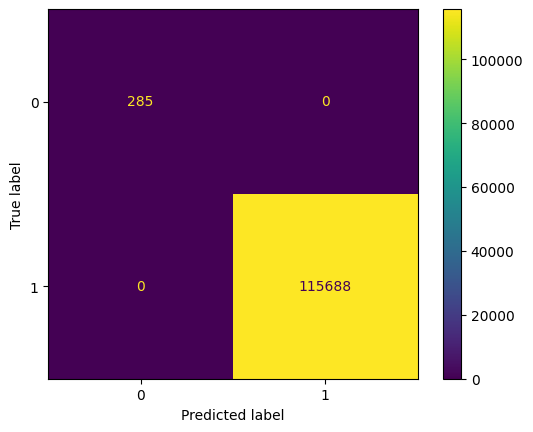

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from matplotlib import pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred=prediction, y_true=test_target)) 
# Then just plot it: 
disp.plot() 
# And show it: 
plt.show()

# Linear Regression 

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
scaler = StandardScaler()
regression_dataset = continuous_dataset[
    ["age", "travel_history_binary", "asymptomatic", "lives_in_Wuhan", "hospitalized_binary",
     "death_binary", "confirmation_binary", "outcome_binary"]
].dropna(how="any", axis=0)

train, validate, test = \
    np.split(regression_dataset.loc[:, regression_dataset.columns != 'age'].sample(frac=1, random_state=42),
             [int(.6 * len(regression_dataset)), int(.8 * len(regression_dataset))])

train = scaler.fit_transform(train.to_numpy())
validate = scaler.fit_transform(validate.to_numpy())
test = scaler.fit_transform(test.to_numpy())

train_target, validate_target, test_target = np.split(regression_dataset.loc[:, regression_dataset.columns == 'age'].sample(frac=1, random_state=42),
             [int(.6 * len(regression_dataset)), int(.8 * len(regression_dataset))])


C:\Users\octav\PycharmProjects\ai_project\.venv311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\octav\PycharmProjects\ai_project\.venv311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [94]:
regression_model = LinearRegression()
regression_model.fit(train, train_target)
reg_prediction = regression_model.predict(test)
sum(reg_prediction.astype(int) == test_target.to_numpy())/ len(test_target) * 100

72.01207630641385

In [76]:
mean_squared_error(test_target, reg_prediction)

84.50633791735433

# Clustering

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [201]:
clustering_dataset = df[
    ["age", "days_since_subject_zero", "outcome"]
].dropna(how="any", axis=0)

le = LabelEncoder()
le.fit(clustering_dataset["outcome"])
clustering_dataset["outcome"] = le.transform(clustering_dataset["outcome"])

scaled_df = MinMaxScaler().fit_transform(clustering_dataset)

scaled_df

array([[0.37190083, 0.24074074, 0.5       ],
       [0.6446281 , 0.28395062, 0.        ],
       [0.50413223, 0.24074074, 1.        ],
       ...,
       [0.42975207, 0.81481481, 1.        ],
       [0.42975207, 0.81481481, 1.        ],
       [0.42975207, 0.81481481, 1.        ]])

In [202]:
clustering_dataset.corr()

,age,days_since_subject_zero,outcome
age,1.000000,-0.077649,0.034502
days_since_subject_zero,-0.077649,1.000000,-0.253796
outcome,0.034502,-0.253796,1.000000


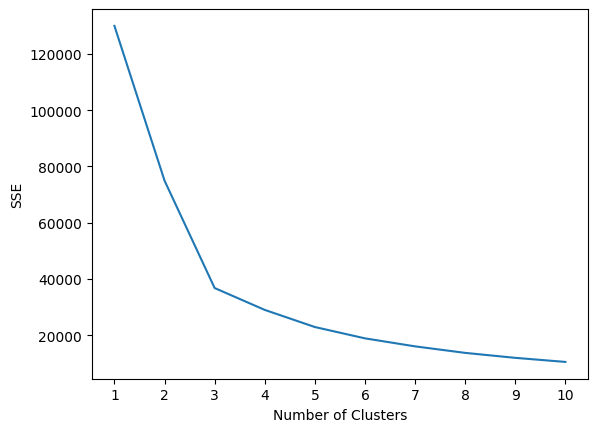

In [203]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [204]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

array([0, 0, 1, ..., 2, 2, 2])

In [205]:
clustering_dataset['cluster'] = kmeans.labels_
clustering_dataset

,age,days_since_subject_zero,outcome,cluster
0,45.0,89.0,1,0
1,78.0,96.0,0,0
2,61.0,89.0,2,1
3,45.0,70.0,2,1
4,45.0,89.0,2,1
...,...,...,...,...
2676306,52.0,182.0,2,2
2676307,52.0,182.0,2,2
2676308,52.0,182.0,2,2
2676309,52.0,182.0,2,2


In [206]:
scaled_df

array([[0.37190083, 0.24074074, 0.5       ],
       [0.6446281 , 0.28395062, 0.        ],
       [0.50413223, 0.24074074, 1.        ],
       ...,
       [0.42975207, 0.81481481, 1.        ],
       [0.42975207, 0.81481481, 1.        ],
       [0.42975207, 0.81481481, 1.        ]])

C:\Users\octav\PycharmProjects\ai_project\.venv311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


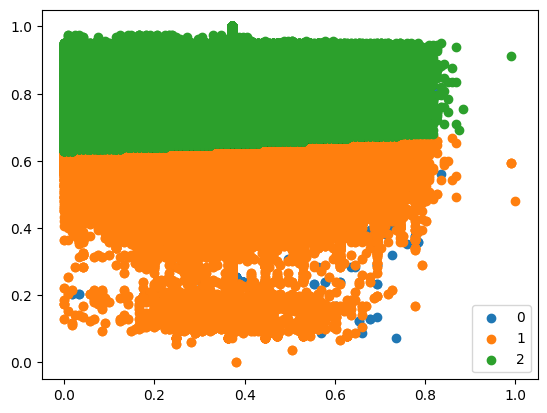

In [207]:
import matplotlib.pyplot as plt
#Getting unique labels
 
u_labels = np.unique(kmeans.labels_)

label = kmeans.fit_predict(scaled_df)
 
#plotting the results:
for i in u_labels:
    plt.scatter(scaled_df[label == i , 0] , scaled_df[label == i , 1] , label = i)
ax = plt.gca()
plt.legend()
plt.show()



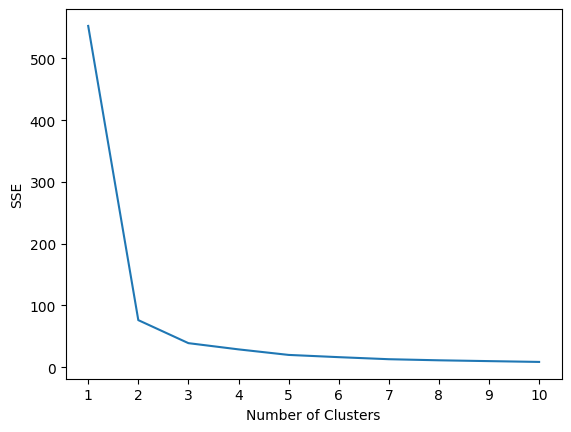

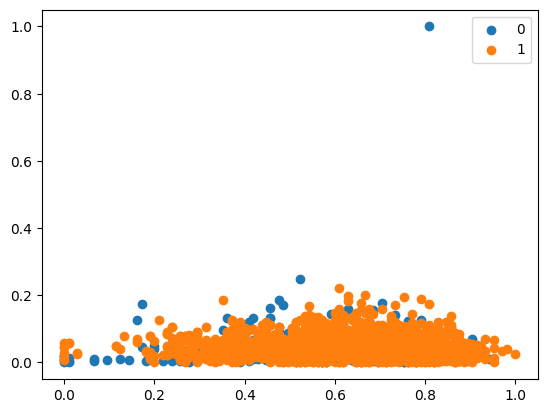

In [186]:
clustering_dataset = df[
    ["age", "recovery_interval", "outcome"]
].dropna(how="any", axis=0)

le = LabelEncoder()
le.fit(clustering_dataset["outcome"])
clustering_dataset["outcome"] = le.transform(clustering_dataset["outcome"])

scaled_df = MinMaxScaler().fit_transform(clustering_dataset)

scaled_df
clustering_dataset.corr()
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_
clustering_dataset['cluster'] = kmeans.labels_
clustering_dataset
scaled_df
import matplotlib.pyplot as plt

#Getting unique labels

u_labels = np.unique(kmeans.labels_)

label = kmeans.fit_predict(scaled_df)

#plotting the results:
for i in u_labels:
    plt.scatter(scaled_df[label == i, 0], scaled_df[label == i, 1], label=i)
ax = plt.gca()
plt.legend()
plt.show()
